In [1]:
import numpy as np
import pandas as pd

In [168]:
# Studyin the efect of two posible selection heuristics for the the most and less beneficial sub population for cosine similarity.
# set parameters:
poapulation_size = 256
sub_population_size = 16
# let have funtion ti calculate the cosine similarity between two num py vectors
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
 
#%% the asumptiopn is that element i of bost vector are coresponing to the same unit in the population. So we want find sub units that cause most the change in the cosine similarity
# we will use the falowing funtion to caculate the change in the cosine similarity for each unit ablation
def  unit_ablation_efect_on_similarity(v1, v2, unit_id):
    if unit_id >= len(v1):
        raise ValueError("unit_id is out of range")
    v1_ablated = np.delete(v1, unit_id)
    v2_ablated = np.delete(v2, unit_id)
    return cosine_similarity(v1, v2) - cosine_similarity(v1_ablated, v2_ablated)

# In the first hurstic we will rank all units with they efect on the cosine similarity and then we will select first 16 units that cause the most change in the cosine similarity

def select_sub_units_h1(v1, v2, sub_population_size):
    unit_ids = np.arange(0, len(v1))
    unit_ids = sorted(unit_ids, key=lambda unit_id: unit_ablation_efect_on_similarity(v1, v2, unit_id), reverse=True)

    return unit_ids[:sub_population_size], unit_ids[-sub_population_size:]

#second hurstic is to select the besr and the worst units and then remove them from the population and repeat the process 
def select_sub_units_h2(v1, v2, sub_population_size):
    v1_for_most = v1.copy()
    v2_for_most = v2.copy()
    most_similar_units = list()
    for i in range(sub_population_size):
        unit_ids = np.arange(0, len(v1_for_most))
        unit_ids = sorted(unit_ids, key=lambda unit_id: unit_ablation_efect_on_similarity(
            v1_for_most, v2_for_most, unit_id), reverse=True)
        v1_for_most = np.delete(v1_for_most, unit_ids[0])
        v2_for_most = np.delete(v2_for_most, unit_ids[0])
        most_similar_units.append(unit_ids[0])
    
    v1_for_lest = v1.copy()
    v2_for_lest = v2.copy()
    lset_similar_units = list()
    for i in range(sub_population_size):
        unit_ids = np.arange(0, len(v1_for_lest))
        unit_ids = sorted(unit_ids, key=lambda unit_id: unit_ablation_efect_on_similarity(
            v1_for_lest, v2_for_lest, unit_id), reverse=True)
        v1_for_lest = np.delete(v1_for_lest, unit_ids[-1])
        v2_for_lest = np.delete(v2_for_lest, unit_ids[-1])
        lset_similar_units.append(unit_ids[-1])
    
    return most_similar_units, lset_similar_units

    
# test with two random vectors
v1 = np.random.rand(poapulation_size)
v2 = np.random.rand(poapulation_size)
most_beneficial_units_h1, lest_beneficial_units_h1 = select_sub_units_h1(v1.copy(), v2.copy(), sub_population_size)
most_beneficial_units_h2, lest_beneficial_units_h2 = select_sub_units_h2(v1.copy(), v2.copy(), sub_population_size)
print("most_similar_units_cosine_similarity for h1: ", cosine_similarity(v1[most_beneficial_units_h1], v2[most_beneficial_units_h1]))
print("less_similar_units_cosine_similarity for h1: ", cosine_similarity(v1[lest_beneficial_units_h1], v2[lest_beneficial_units_h1]))
print("most_similar_units_cosine_similarity for h2: ", cosine_similarity(v1[most_beneficial_units_h2], v2[most_beneficial_units_h2]))
print("less_similar_units_cosine_similarity for h2: ", cosine_similarity(v1[lest_beneficial_units_h2], v2[lest_beneficial_units_h2]))
print("original_cosine_similarity: ", cosine_similarity(v1, v2))


most_similar_units_cosine_similarity for h1:  0.9930990297639962
less_similar_units_cosine_similarity for h1:  0.15197925428479175
most_similar_units_cosine_similarity for h2:  0.8360829078249116
less_similar_units_cosine_similarity for h2:  0.6207734693091466
original_cosine_similarity:  0.7191321390870804


In [180]:
#simulate the efect of each husrtic on the cosine similarity both for the most and the less beneficial sub population for 1000 random vectors comes from random ball

# set parameters:
poapulation_size = 256
sub_population_size = 16
number_of_vectors = 250

# have funtion to generate random vectors from random ball
# ref: https://stackoverflow.com/questions/38038776/computationally-picking-a-random-point-on-a-n-sphere
# ref: https://mathworld.wolfram.com/HyperspherePointPicking.html
# ref: https://mathworld.wolfram.com/SpherePointPicking.html 
import random
import math

def randnsphere(n):
  v = [random.gauss(0, 1) for i in range(0, n)]
  inv_len = 1.0 / math.sqrt(sum(coord * coord for coord in v))
  return np.array([coord * inv_len for coord in v])

#run the simulation
most_similar_units_cosine_similarity_h1 = list()
less_similar_units_cosine_similarity_h1 = list()
most_similar_units_cosine_similarity_h2 = list()
less_similar_units_cosine_similarity_h2 = list()
real_cosine_similarity = list()
for i in range(number_of_vectors):
    v1 = randnsphere(poapulation_size)
    v2 = randnsphere(poapulation_size)
    most_beneficial_units_h1, lest_beneficial_units_h1 = select_sub_units_h1(v1.copy(), v2.copy(), sub_population_size)
    most_beneficial_units_h2, lest_beneficial_units_h2  = select_sub_units_h2(v1.copy(), v2.copy(), sub_population_size)
    most_similar_units_cosine_similarity_h1.append(cosine_similarity(v1[most_beneficial_units_h1], v2[most_beneficial_units_h1]))
    less_similar_units_cosine_similarity_h1.append(cosine_similarity(v1[lest_beneficial_units_h1], v2[lest_beneficial_units_h1]))
    most_similar_units_cosine_similarity_h2.append(cosine_similarity(v1[most_beneficial_units_h2], v2[most_beneficial_units_h2]))
    less_similar_units_cosine_similarity_h2.append(cosine_similarity(v1[lest_beneficial_units_h2], v2[lest_beneficial_units_h2]))
    real_cosine_similarity.append(cosine_similarity(v1, v2))
    

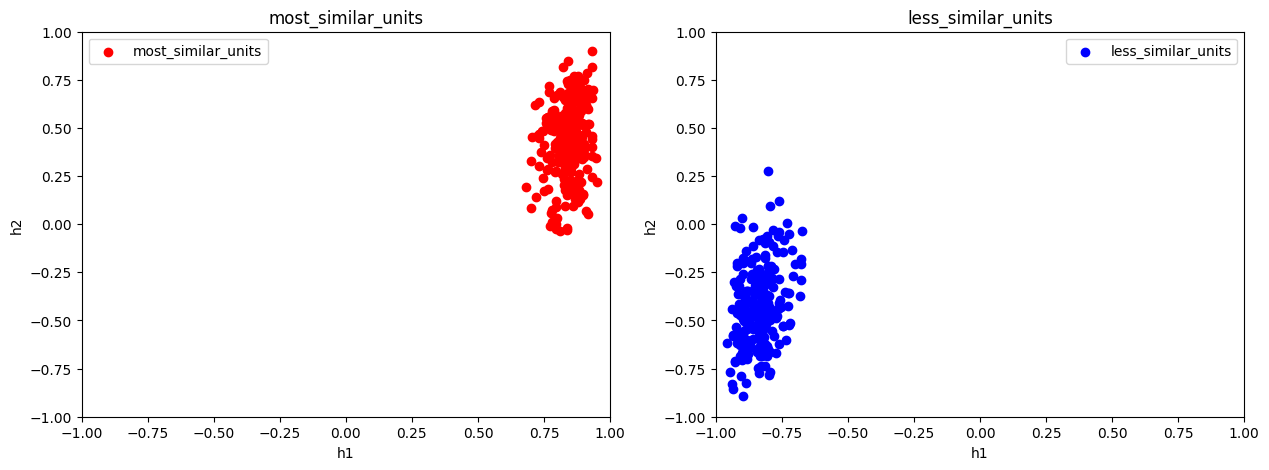

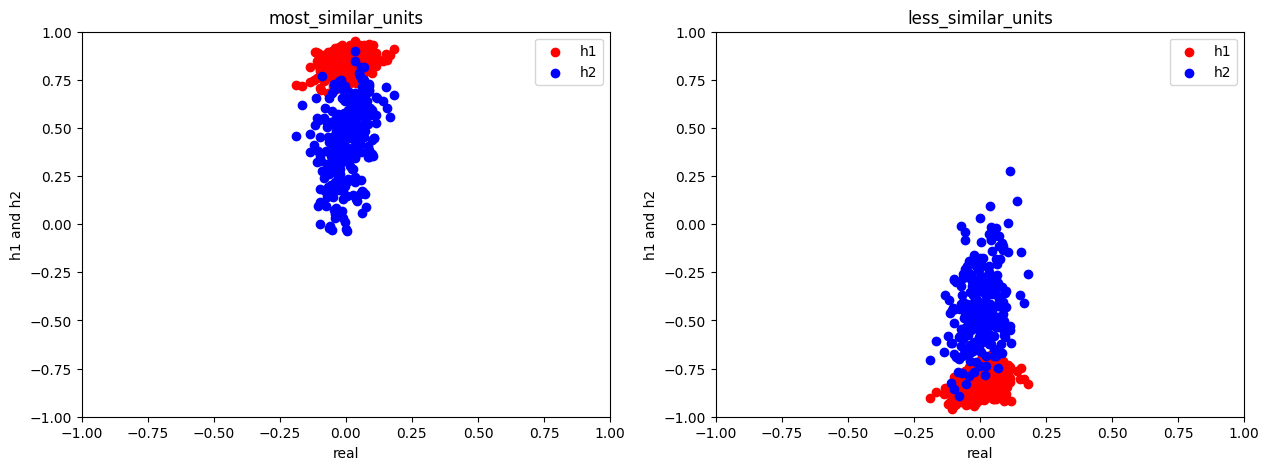

In [181]:
# ploting the results
import matplotlib.pyplot as plt
# scatter plot to show the relation between the cosine similarity of the most and the less beneficial sub population between h1 and h2 in subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(most_similar_units_cosine_similarity_h1, most_similar_units_cosine_similarity_h2, c='r', label='most_similar_units')
axs[0].set_title('most_similar_units')
axs[0].set_xlabel('h1')
axs[0].set_ylabel('h2')
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)
axs[0].legend()

axs[1].scatter(less_similar_units_cosine_similarity_h1, less_similar_units_cosine_similarity_h2, c='b', label='less_similar_units')
axs[1].set_title('less_similar_units')
axs[1].set_xlabel('h1')
axs[1].set_ylabel('h2')
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-1, 1)
axs[1].legend()

plt.show()

# compair real and h1 and h2 cosine similarity
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(real_cosine_similarity, most_similar_units_cosine_similarity_h1, c='r', label='h1')
axs[0].scatter(real_cosine_similarity, most_similar_units_cosine_similarity_h2, c='b', label='h2')
axs[0].set_title('most_similar_units')
axs[0].set_xlabel('real')
axs[0].set_ylabel('h1 and h2')
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)
axs[0].legend()

axs[1].scatter(real_cosine_similarity, less_similar_units_cosine_similarity_h1, c='r', label='h1')
axs[1].scatter(real_cosine_similarity, less_similar_units_cosine_similarity_h2, c='b', label='h2')
axs[1].set_title('less_similar_units')
axs[1].set_xlabel('real')
axs[1].set_ylabel('h1 and h2')
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-1, 1)
axs[1].legend()
